### Kaykay Essien

Problem: Converting existing buyers into sellers is an important way to keep them engaged with the marketplace. How would you characterize users who start out as buyers, but later publish their own listings, relative to users who have only purchased? How much time typically elapses between a user’s first purchase and their first listing? Explain how you might approach predicting which buyers are most likely to convert into sellers.

### Summary:

##### Purchase Behaviour:
1. 8,642 users buy only, compared to 1358 who sell. Of these, 830 were buyers first, while 568 were sellers first. 

2. However, while those who only buy account for about 18000 purchases, and sellers account for 12000 purchases, sellers outspend buyers, 4:1. Those who buy first before selling make 10 transactions on average, while those who sell first make 6, compared to 2 for those who only buy. Also, while those who only buy and those who sell first make around 4 transactions per year, buyers who later sell make 6 transactions per year. 

3. Those who only buy purchase 45% new items, while those who sell purchase 32% new items. 

4. The average seller outspends the average buyer 4:1, with those who buy before selling spending USD 2700, sellers-first spending USD 2375 and buyers only spending a paltry USD 670. However, the difference spent per transaction is about the same. 

##### Sales Behaviour:
1. Those who sell first make twice as many sales as those who buy first, at 15,501 to 6815. They also sell more per user, with sellers-first making 29 sales on average compared with buyer-first's 8. They also make around 16 sales a year, to 5 for buyers-first.

2. Those who sell first make 4 times as much as those who buy first (USD 10300 : USD 2800), and make around USD 600 per sale, compared to USD 470 for those who buy first

### Recommendation:

Sellers are clearly more profitable than those who only buy. However, as the average seller is 700 days old, compared to 460 for the average buyer-only, a good experiment to perform would be to compare current cohort of buyers-only to the sellers-only, when their average age reaches 700, and see if there are any gains that make the difference in their purchasing behaviour less significant. Moreover, it will be worthwhile to account for those buyers who become sellers, and compare the statistics of the group without sellers, to those with sellers. 

Regardless, it is unexpected that time will make too much of a difference in this case, and encouraging customers to sell is a good step towards getting them more involved in the site.

### Predicting Future Buyers
The biggest challenge with making this prediction is the amount of data at hand and how it is sampled. A simple classification algorithm like random forest, SVM(with normalised features) or logistic regression will do well to show which users ARE buyers and which are not. However, in this case, a future state is being predicted. A clustering method could be more interesting for making this prediction. However, an important factor will be a dataset with a statistically significant subset users having their age over 4 years, at which point we can be more certain if they will never be sellers, based on the time it takes on average to become a seller. 

When a sample of transactions where the registration date of the users is at least 4 years old is gathered, a table, with schema similar to that which has been used for the other analysis in this homework, should be made from it. However, in this case, when selecting users who become sellers, only their transactional behaviour BEFORE they became sellers should be selected. The target classification that they are sellers can remain in the schema, where is seller = 1, and not seller = 0.

If using a classification method, the data must be sampled such that it is not imbalanced, and cross validated. A logistic regression method could be used to show which features are most important in making predictions, and those features extracted to be used in a random forest, or SVM. Based on this model, one could classify current buyers as sellers, even if they aren't sellers yet, based on the template of sellers we provided for training the model.

For clustering, care should be taken while performing clustering to group users, based on whether they become sellers or not. Once this is done, we will have the centroids, of the clusters of future sellers. In making predictions, data can be plotted onto this cluster model, and probabilities that users become sellers made, based on their distances from the centroids.

In [88]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
import math 
from IPython.display import clear_output
import matplotlib.pyplot as plt

grandmaster = pd.read_csv('grandmaster.csv')


In [89]:
buyer_only = grandmaster.loc[grandmaster['is_seller'] == 0]
seller = grandmaster.loc[grandmaster['is_seller'] == 1]
buyer_first = seller.loc[seller['first_purchase'] < seller['first_listing_date']]
seller_first = seller.loc[seller['first_purchase'] > seller['first_listing_date']]


In [90]:
## Overall Buyer Seller Transactions
categories = [buyer_only,seller,buyer_first,seller_first]
buyer_seller_dynamic = pd.DataFrame()
buyer_seller_dynamic['category'] = pd.Series(['buyer_only','seller','buyer_first','seller_first']).values


## user totals
new_col = []
for i in range(4):
    new_col.append(categories[i].shape[0])
buyer_seller_dynamic['total users']=pd.Series(new_col)

## average age
new_col = []
for i in range(4):
    new_col.append((categories[i])['age'].sum()/categories[i].shape[0])
buyer_seller_dynamic['average age']=pd.Series(new_col)

## time before user is active
new_col = []
for i in range(4):
    new_col.append((categories[i])['before_first_purchase'].sum()/categories[i].shape[0])
buyer_seller_dynamic['before first purchase']=pd.Series(new_col)

## time since user was active
new_col = []
for i in range(4):
    new_col.append((categories[i])['since_last_purchase'].sum()/categories[i].shape[0])
buyer_seller_dynamic['since last purchase']=pd.Series(new_col)

## total purchases
new_col = []
for i in range(4):
    new_col.append((categories[i])['total_purchases'].sum())
buyer_seller_dynamic['total purchases']=pd.Series(new_col)

## purchases per user
new_col = []
for i in range(4):
    new_col.append((categories[i])['total_purchases'].sum()/categories[i].shape[0])
buyer_seller_dynamic['purchases per user']=pd.Series(new_col)

## purchase frequency
new_col = []
for i in range(4):
    new_col.append(((categories[i])['purchase_frequency'].sum()*365.25)/categories[i].shape[0])
buyer_seller_dynamic['purchase frequency']=pd.Series(new_col)

## Brand new vs Used
new_col = []
for i in range(4):
    new_col.append((categories[i])['brand_new_transactions'].sum()/(categories[i])['total_purchases'].sum())
buyer_seller_dynamic['Percentage Brand New']=pd.Series(new_col)

## total revenue
new_col = []
for i in range(4):
    new_col.append(((categories[i])['total_expenditure'].sum())/100)
buyer_seller_dynamic['total revenue']=pd.Series(new_col)

## revenue per user
new_col = []
for i in range(4):
    new_col.append(((categories[i])['total_expenditure'].sum()/categories[i].shape[0])/100)
buyer_seller_dynamic['revenue per user']=pd.Series(new_col)

## revenue per transaction
new_col = []
for i in range(4):
    new_col.append(((categories[i])['expenditure_per_transaction'].sum()/categories[i].shape[0])/100)
buyer_seller_dynamic['revenue per transaction']=pd.Series(new_col)

## time before listing
new_col = []
for i in range(4):
    new_col.append((categories[i])['before_first_listing'].sum()/categories[i].shape[0])
buyer_seller_dynamic['time before listing']=pd.Series(new_col)

## time before sale
new_col = []
for i in range(4):
    new_col.append((categories[i])['before_first_sale'].sum()/categories[i].shape[0])
buyer_seller_dynamic['time before sale']=pd.Series(new_col)

## time since listing
new_col = []
for i in range(4):
    new_col.append((categories[i])['since_last_listing'].sum()/categories[i].shape[0])
buyer_seller_dynamic['time since listing']=pd.Series(new_col)

## time since sale
new_col = []
for i in range(4):
    new_col.append((categories[i])['since_last_sale'].sum()/categories[i].shape[0])
buyer_seller_dynamic['time since sale']=pd.Series(new_col)


## total sales
new_col = []
for i in range(4):
    new_col.append((categories[i])['total_sales'].sum())
buyer_seller_dynamic['total sales']=pd.Series(new_col)

## sales per user
new_col = []
for i in range(4):
    new_col.append((categories[i])['total_sales'].sum()/categories[i].shape[0])
buyer_seller_dynamic['sales per user']=pd.Series(new_col)

## sales frequency
new_col = []
for i in range(4):
    new_col.append(((categories[i])['sales_frequency'].sum()*365.25)/categories[i].shape[0])
buyer_seller_dynamic['sales frequency']=pd.Series(new_col)

## total earnings
new_col = []
for i in range(4):
    new_col.append(((categories[i])['earnings'].sum())/100)
buyer_seller_dynamic['total earnings']=pd.Series(new_col)

## earnings per user
new_col = []
for i in range(4):
    new_col.append(((categories[i])['earnings'].sum()/categories[i].shape[0])/100)
buyer_seller_dynamic['earnings per user']=pd.Series(new_col)

## earnings per sale
new_col = []
for i in range(4):
    new_col.append(((categories[i])['earnings_per_sale'].sum()/categories[i].shape[0])/100)
buyer_seller_dynamic['earnings per sale']=pd.Series(new_col)
    
buyer_seller_dynamic.set_index('category')

,total users,average age,before first purchase,since last purchase,total purchases,purchases per user,purchase frequency,Percentage Brand New,total revenue,revenue per user,...,time before listing,time before sale,time since listing,time since sale,total sales,sales per user,sales frequency,total earnings,earnings per user,earnings per sale
category,,,,,,,,,,,,,,,,,,,,,
buyer_only,8642,458.679588,57.780491,329.991090,18303,2.117913,3.955990,0.453204,5799579.08,671.092233,...,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.00,0.000000,0.000000
seller,1358,695.187040,172.299705,203.373343,11951,8.800442,5.468964,0.322065,3669020.97,2701.782747,...,225.334315,247.767305,231.924890,198.031664,22316,16.432990,9.125407,7738552.96,5698.492607,517.694658
buyer_first,830,700.034940,110.169880,208.734940,8414,10.137349,6.308328,0.328619,2414519.99,2909.060229,...,300.950602,320.606024,216.940964,186.619277,6815,8.210843,4.884988,2306843.07,2779.329000,466.958659
seller_first,528,687.566288,269.965909,194.945076,3537,6.698864,4.149510,0.306474,1254500.98,2375.948826,...,106.467803,133.267045,255.479167,215.971591,15501,29.357955,15.791217,5431709.89,10287.329337,597.450112


In [91]:
def bar_plot(col, ylab, title, color):
    width = 0.6
    z = [1,2,3,4]
    x = [1.3,2.3,3.3,4.3]
    labels = buyer_seller_dynamic['category'].tolist()

    fig, ax = plt.subplots(figsize=(6,4))
    ax.bar(z,buyer_seller_dynamic[col],width,alpha = 0.7, color=color)

    plt.ylabel(ylab)
    plt.title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    plt.show()

def bar_default(col, ylab, title):
    width = 0.6
    z = [1,2,3,4]
    x = [1.3,2.3,3.3,4.3]
    labels = buyer_seller_dynamic['category'].tolist()

    fig, ax = plt.subplots(figsize=(6,4))
    ax.bar(z,buyer_seller_dynamic[col],width)

    plt.ylabel(ylab)
    plt.title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    plt.show()

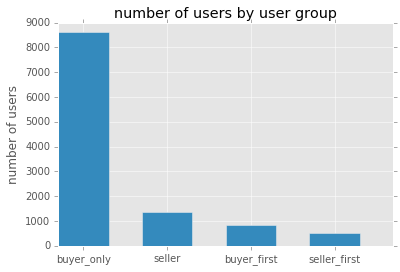

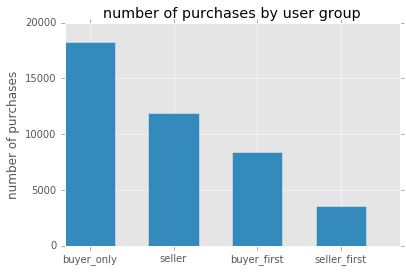

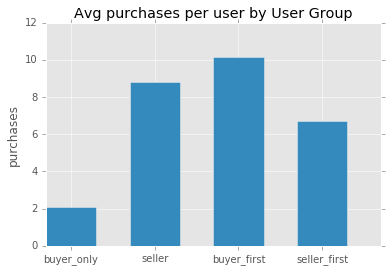

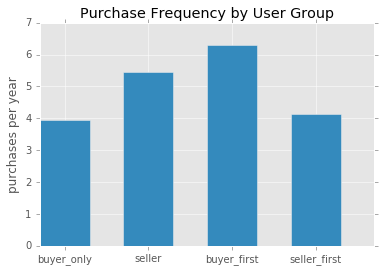

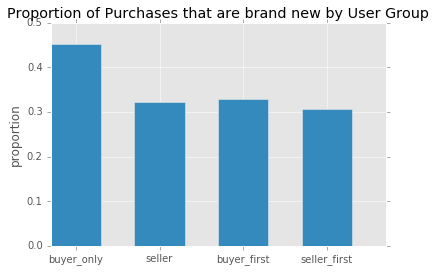

In [93]:
% matplotlib inline
plt.style.use('ggplot')

bar_default('total users','number of users', 'number of users by user group')
bar_default('total purchases','number of purchases', 'number of purchases by user group')
bar_default('purchases per user', 'purchases', 'Avg purchases per user by User Group')
bar_default('purchase frequency', 'purchases per year', 'Purchase Frequency by User Group')
bar_default('Percentage Brand New', 'proportion', 'Proportion of Purchases that are brand new by User Group')

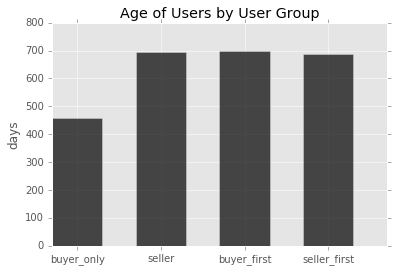

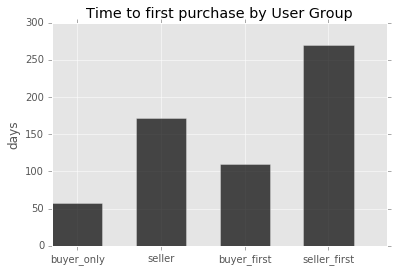

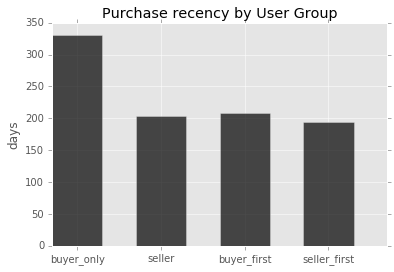

In [94]:
% matplotlib inline
plt.style.use('ggplot')

bar_plot('average age', 'days', 'Age of Users by User Group','black')
bar_plot('before first purchase', 'days', 'Time to first purchase by User Group','black')
bar_plot('since last purchase', 'days', 'Purchase recency by User Group','black')

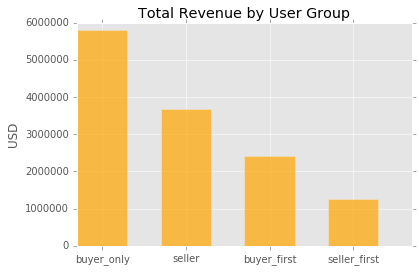

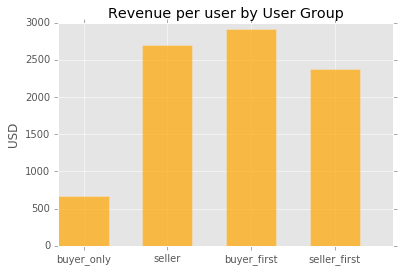

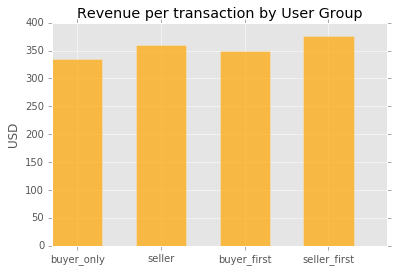

In [95]:
% matplotlib inline
plt.style.use('ggplot')

bar_plot('total revenue', 'USD', 'Total Revenue by User Group','orange')
bar_plot('revenue per user', 'USD', 'Revenue per user by User Group','orange')
bar_plot('revenue per transaction', 'USD', 'Revenue per transaction by User Group','orange')


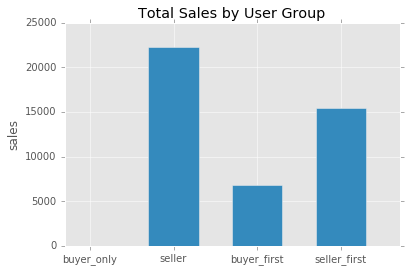

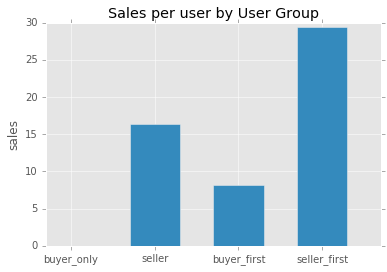

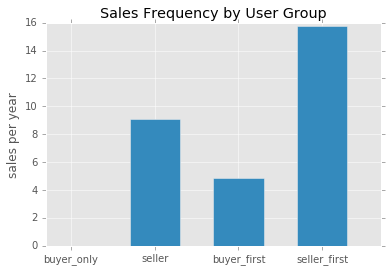

In [96]:
% matplotlib inline
plt.style.use('ggplot')

bar_default('total sales', 'sales', 'Total Sales by User Group')
bar_default('sales per user', 'sales', 'Sales per user by User Group')
bar_default('sales frequency', 'sales per year', 'Sales Frequency by User Group')


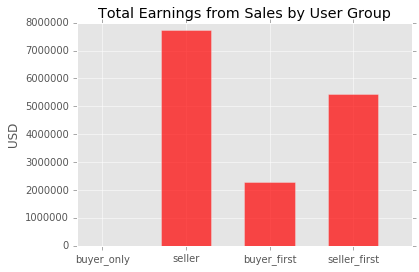

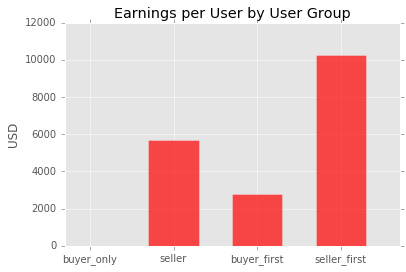

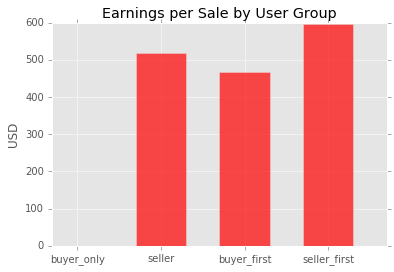

In [97]:
% matplotlib inline
plt.style.use('ggplot')

bar_plot('total earnings', 'USD', 'Total Earnings from Sales by User Group','red')
bar_plot('earnings per user', 'USD', 'Earnings per User by User Group','red')
bar_plot('earnings per sale', 'USD', 'Earnings per Sale by User Group','red')